<u>INFO 6205 - Program Structure and Algorithms(PSA)</u>\
<u>Assignment 2:</u>\
<u>Student Name:</u> Lokesh Mohan Jeswani  [NU ID: 002795957]\
<u>Professor:</u> Nick Bear Brown

<u><b>Q1.</b></u>

 You are given a recurrence relation for the runtime of an algorithm, T(n), defined as follows:

T(n) = 2T(n/2) + n log^2 n

Determine the asymptotic runtime complexity of this algorithm using the Master Theorem if applicable. If the Master Theorem does not apply, indicate so.


<u>**Answer & Justification :**</u>

To analyze the runtime complexity of the given recurrence relation using the Master Theorem, we compare it to the standard form of the Master Theorem:

T(n) = aT(n/b) + f(n)

In the given recurrence relation:

- a = 2
- b = 2
- f(n) = n log^2 n
Now, we need to compare f(n) to n^(log_b a):

n^(log_b a) = n^(log_2 2) = n^1 = n

Let's analyze the comparison:

1. If f(n) is polynomially smaller than n^(log_b a), which means f(n) = O(n^(log_b a)), then the runtime complexity is T(n) = Θ(n^(log_b a)).

2. If f(n) is polynomially larger than n^(log_b a), which means f(n) = Ω(n^(log_b a)), and if af(n/b) is polynomially smaller than f(n), which means af(n/b) = O(f(n)), then the runtime complexity is T(n) = Θ(f(n)).

3. If f(n) and a*f(n/b) have the same asymptotic growth, which means f(n) = Θ(f(n)), then the runtime complexity is T(n) = Θ(n^(log_b a) * log^k n), where k is a positive integer.

In our case:

- f(n) = n log^2 n
- n^(log_b a) = n^(log_2 2) = n
Now, we compare f(n) to n:

f(n) = n log^2 n
n^(log_b a) = n

Comparing f(n) to n, we see that f(n) is not polynomially smaller or larger than n; they have the same asymptotic growth. Therefore, the Master Theorem does not apply to this recurrence relation.

As a result, we cannot determine the asymptotic runtime complexity using the Master Theorem, and the answer is that the Master Theorem does not apply.


<u><b>Q2.</b></u>

 You are given a set of items, each with a weight and a value, and a knapsack with a weight limit, W. Your task is to select a subset of items to maximize the combined value while ensuring the total weight does not exceed the knapsack's weight limit. Use dynamic programming to solve this problem.

Write an algorithm to find the maximum combined value that can be obtained within the weight limit of the knapsack.

<u>Input</u>
- Two arrays, weights and values, representing the weights and values of N items, where 1 ≤ N ≤ 20.
- An integer, W, representing the weight limit of the knapsack, where 1 ≤ W ≤ 100.

<u>**Answer & Justification :**</u>
<u>Output</u>

- An integer representing the maximum combined value that can be obtained by selecting a subset of items to fill the knapsack.

<u>Algorithm</u>
To solve this problem using dynamic programming, you can follow this algorithm:

1. Create a 2D array dp of size (N+1) x (W+1) initialized to all zeros.

2. Iterate over the items from 1 to N:

 - For each item i, iterate over the possible knapsack weights from 1 to W:
 - If the weight of item i, weights[i-1], is less than or equal to the current knapsack weight, j, update dp[i][j] as the maximum of the following two values:
        i)The value of the previous row dp[i-1][j], which represents not including the current item in the knapsack.
        ii)The sum of the value of the current item values[i-1] and the value in the previous row and the remaining knapsack weight dp[i-1][j-weights[i-1]].
3. The final result is stored in dp[N][W], which represents the maximum combined value that can be obtained within the weight limit of the knapsack.

In [1]:
#Sample Input:
weights = [3, 4, 2, 5]
values = [5, 6, 3, 9]
W = 7

In [2]:
def knapsack_max_value(weights, values, W):
    N = len(weights)
    dp = [[0] * (W + 1) for _ in range(N + 1)]

    for i in range(1, N + 1):
        for j in range(1, W + 1):
            if weights[i - 1] <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weights[i - 1]] + values[i - 1])
            else:
                dp[i][j] = dp[i - 1][j]

    return dp[N][W]

weights = [3, 4, 2, 5]
values = [5, 6, 3, 9]
W = 7
result = knapsack_max_value(weights, values, W)
print("Maximum combined value:", result)

Maximum combined value: 12


<u>Explaination:</u>

In this example, the algorithm will find the maximum combined value that can be obtained by selecting items with weights [3, 4] and values [5, 6] to fill the knapsack with a weight limit of 7. The maximum combined value is 12.

<u><b>Q3.</b></u> 

You are tasked with encoding a traditional folk song that follows the pattern of adding one new line in each verse. The song consists of n verses, and each verse builds upon the previous one. You want to represent this song efficiently in a script so that the length of the script, f(n), grows as slowly as possible. Each line in the song is bounded by a constant c in terms of length.

Provide an algorithmic approach to encode this song using a script with minimal length while ensuring that the complete song can be reconstructed from this encoded script. Describe your algorithm and calculate the length of the script as a function of n, denoted as f(n).


<u>Solution</u>
To encode the song efficiently while minimizing the length of the script, we can use a recursive approach combined with memoization. Here's how it works:

    1. Algorithm Overview:

    -   We will create a recursive function, encodeVerse(verseNumber), that generates the new line for each verse.
    -   The function encodeVerse will take the verse number as input and return the new line added in that verse.
    -   To generate each verse, we call encodeVerse for verse numbers from 1 to n.
    -   We will use memoization to store the lines for each verse as they are generated to avoid redundant calculations.

    2. Pseudocode for Encoding the Song:

In [4]:
# Initialize a dictionary to store encoded lines
memo = {}

# Function to encode a verse
def encodeVerse(verseNumber):
    # Base case: First verse
    if verseNumber == 1:
        return "First verse line."

    # Check if the verse has been encoded before (memoization)
    if verseNumber in memo:
        return memo[verseNumber]

    # Generate the new line for the current verse
    newLine = "New line for verse " + str(verseNumber) + ". " + encodeVerse(verseNumber - 1)
    
    # Store the generated line in memo
    memo[verseNumber] = newLine
    
    return newLine

# Encode the entire song
def encodeSong(n):
    encodedSong = ""
    for verseNumber in range(1, n + 1):
        encodedSong += encodeVerse(verseNumber) + "\n"
    return encodedSong

# Example: Encode a song with 5 verses
n = 5
encodedScript = encodeSong(n)

-   Calculation of Script Length as a Function of n (f(n)):
The script length is determined by the total number of words in the encoded song. Since each verse adds one line, and each line is bounded by a constant c, the length of the script is proportional to the number of verses (n). Therefore, f(n) = O(n).

<u>Explanation:</u>

This approach efficiently encodes the song using recursion and memoization. It ensures that the script's length grows linearly with the number of verses, minimizing script length while allowing complete reconstruction of the song.

<u><b>Q4.</b></u>

 Your friends are working on a time-series data mining project and need an efficient algorithm to determine whether a given sequence S' is a subsequence of another longer sequence S. A subsequence means that the events in S' can be found in S in the same order (though not necessarily consecutively). Your task is to write an algorithm to solve this problem.

Provide a function, isSubsequence(arr1, arr2), that takes two sequences of events as input:

arr1: An array of strings, representing the longer sequence S, with a length of n (1 ≤ n ≤ 10^5).
arr2: An array of strings, representing the shorter sequence S', with a length of m (1 ≤ m ≤ n).
The function should return True if S' is a subsequence of S and False otherwise.

<u>Example:</u>

arr1 = ["homer", "marge", "bart", "lisa", "maggie", "bart"]

arr2 = ["marge", "lisa", "maggie"]

result = isSubsequence(arr1, arr2)

<Result should be True, as arr2 is a subsequence of arr1.>

<u>Solution:</u>

Here's the Python function to check if S' is a subsequence of S:

In [8]:
def isSubsequence(arr1, arr2):
    n1 = len(arr1)
    n2 = len(arr2)
    
    # Ensure valid inputs
    if n1 < 0 or n2 < 0:
        return False
    
    # Walk through arr1, marking off elements of arr2 as we find them
    k1 = 0
    k2 = 0
    
    while k1 < n1 and k2 < n2:
        if arr1[k1] == arr2[k2]:
            k2 += 1
        k1 += 1
    
    return k2 == n2

# Example usage:
arr1 = ["homer", "marge", "bart", "lisa", "maggie", "bart"]
arr2 = ["marge", "lisa", "maggie"]
result = isSubsequence(arr1, arr2)
print(result)  # Should print True


True


<u><b>Q5.</b></u>

You are tasked with finding a minimum spanning tree (MST) in a weighted undirected graph using Prim's algorithm. This graph is represented as an adjacency matrix, and you need to follow the steps of Prim's algorithm to construct the MST.

Below is an example of an adjacency matrix representing a graph. Use Prim's algorithm to find the minimum spanning tree for this graph. Show your steps by providing the edges you select at each iteration of the algorithm until the MST is complete.

In [10]:

[[ 0,  2,  0,  3,  0],
[ 2,  0,  4,  0,  5],
[ 0,  4,  0,  1,  6],
[ 3,  0,  1,  0,  7],
[ 0,  5,  6,  7,  0]]


[[0, 2, 0, 3, 0],
 [2, 0, 4, 0, 5],
 [0, 4, 0, 1, 6],
 [3, 0, 1, 0, 7],
 [0, 5, 6, 7, 0]]

<u><b>Solution:</b></u>
To find the minimum spanning tree (MST) using Prim's algorithm, we start with an arbitrary vertex and iteratively add edges to form a tree with the minimum total weight. Here are the steps and the edges selected at each iteration:

    -   <u>Step 1:</u> Start with an arbitrary vertex (e.g., vertex 0). We'll begin building the MST from here.

    -   <u>Step 2:</u> Find the minimum-weight edge connected to the current MST. Initially, this is edge (0, 1) with a weight of 2. Add this edge to the MST.

        MST: (0, 1)

    -   <u>Step 3:</u> Find the minimum-weight edge connected to the current MST. This is edge (0, 3) with a weight of 3. Add this edge to the MST.

        MST: (0, 1), (0, 3)

    -   <u>Step 4:</u> Find the minimum-weight edge connected to the current MST. This is edge (3, 2) with a weight of 1. Add this edge to the MST.

        MST: (0, 1), (0, 3), (3, 2)

    -   <u>Step 5:</u> Find the minimum-weight edge connected to the current MST. This is edge (2, 4) with a weight of 6. Add this edge to the MST.

        MST: (0, 1), (0, 3), (3, 2), (2, 4)

<i>The MST is now complete, and no more edges can be added while maintaining a tree. The total weight of this minimum spanning tree is 2 + 3 + 1 + 6 = 12.</i>

<b><u>Justification</b></u>

Prim's algorithm works by iteratively selecting the minimum-weight edge that connects the current MST to a vertex outside the MST. It ensures that we construct a tree with the minimum total weight. In this case, we started with vertex 0 and followed the steps of the algorithm to select edges until the MST was complete.

The selected edges (0, 1), (0, 3), (3, 2), and (2, 4) form a minimum spanning tree with a total weight of 12. This tree spans all vertices while minimizing the sum of edge weights, making it a valid MST for the given graph.

<u><b>Q6.</b></u>

A transportation company manages a fleet of vehicles to deliver goods from warehouses to various destinations. Each day, the company needs to determine the most cost-effective delivery route for the day, considering changing fuel prices, road conditions, and the addition of new destinations and routes. Develop an algorithm to efficiently find the most cost-effective delivery route for the day.

<u><b>Solution:</b></u>

To efficiently find the most cost-effective delivery route for the day, we can formulate this problem as a graph problem. Here's the algorithm:

<u><b>Algorithm:</b></u>

1. **Create a Weighted Directed Graph:**

   - Create a weighted directed graph where each location (warehouses, destinations, and intermediate waypoints) is represented as a node in the graph.
   
   - Introduce a distinguished node, the "start" node, which is connected to each warehouse node with edges weighted by the distance and cost of travel (considering fuel prices and road conditions).
   
   - For all other nodes, connect them to nodes representing the possible routes or connections, with edges weighted by the cost and distance of travel along those routes.

2. **Apply a Single-Source Shortest Path Algorithm:**

   - Apply a single-source shortest path algorithm (such as Dijkstra's algorithm) starting from the distinguished "start" node.
   
   - This algorithm computes the shortest path from the "start" node to all other nodes in the graph, considering factors such as fuel costs, road conditions, and distances.

3. **Determine the Most Cost-Effective Route:**

   - After running the shortest path algorithm, we have calculated the minimum cost to reach each destination and waypoint.
   
   - To determine the most cost-effective route for the day, compute the minimum cost to reach each possible destination.
   
   - Select the destination with the minimum cost as the delivery route for the day.

<u><b>Justification:</b></u>

This algorithm is efficient for the following reasons:

1. **Graph Representation:** By representing the delivery routes as a weighted directed graph, we can efficiently model the relationships between locations, routes, and costs. This graph representation is flexible and can handle changes in fuel prices, road conditions, and route additions.

2. **Single-Source Shortest Path Algorithm:** The core of the algorithm utilizes a single-source shortest path algorithm, which has a time complexity of O((V + E)log(V)), where V is the number of nodes (locations and routes) and E is the number of edges (connections between nodes). This complexity ensures efficient computation of the minimum cost to reach each destination.

3. **Cost-Effective Route Determination:** Calculating the minimum cost to reach each destination is straightforward and has a time complexity of O(V), where V is the number of possible destinations. This step does not significantly impact the overall time complexity of the algorithm.

In summary, this algorithm efficiently determines the most cost-effective delivery route for the day by modeling the problem as a graph and using a shortest path algorithm to compute costs. It then selects the destination with the minimum cost, making it a practical solution for a transportation company with changing conditions and delivery routes.

<u><b>Q7.</b></u>

You are in charge of managing a transportation network that connects various cities, and you need to find the shortest path from City A to City B. To achieve this, you decide to use Dijkstra's algorithm.

Below is an adjacency matrix representing the distances between cities (0 indicates a direct connection, and -1 indicates no direct connection). Use Dijkstra's algorithm to find the shortest path from City A to City B. Show your steps by providing the sequence of cities you visit and the total distance.

<u><b>Adjacency Matrix</b></u>

In [12]:
[[ 0,  5,  3, -1, -1],
 [ 5,  0, -1,  4, -1],
 [ 3, -1,  0,  2,  3],
 [-1,  4,  2,  0,  1],
 [-1, -1,  3,  1,  0]]


[[0, 5, 3, -1, -1],
 [5, 0, -1, 4, -1],
 [3, -1, 0, 2, 3],
 [-1, 4, 2, 0, 1],
 [-1, -1, 3, 1, 0]]

<u><b>Answer:</b></u>

To solve this problem using Dijkstra's algorithm, you can follow these steps:

    1. Start at City A.

    2. Initialize a distance array to track the minimum distance to each city from City A. Initially, set the distance to A as 0 and all other distances to infinity.

    3. Create a set to keep track of visited cities. Initially, all cities are unvisited.

    4. Repeat the following until all cities have been visited:

        - Find the unvisited city with the smallest distance from City A.
        - For this city, update the distances to its neighboring cities if the new distance is smaller than the current distance.
        - Mark the current city as visited.
    5. Once all cities are visited, the distance array will contain the shortest distance from City A to all other cities.

Here's the step-by-step solution:

<b>Step 1:</b> Start at City A.

<b>Step 2:</b> Initialize the distance array and set of visited cities.

Distance array: A: 0, B: ∞, C: ∞, D: ∞, E: ∞
Set of visited cities: {}
<b>Step 3:</b> Repeat until all cities are visited:

<<b>Iteration 1:</b>

    - Visit City A.
    - Update distances to neighboring cities:
        - Distance to B: 5 (A -> B)
        - Distance to C: 3 (A -> C)
    - Mark A as visited.
    - Current state:
        - Distance array: A: 0, B: 5, C: 3, D: ∞, E: ∞
        - Set of visited cities: {A}

<b>Iteration 2:</b>

    - Visit City C (the unvisited city with the smallest distance).
    - Update distances to neighboring cities:
        - Distance to D: 5 (A -> C -> D)
        - Distance to E: 6 (A -> C -> E)
    - Mark C as visited.
    - Current state:
        - Distance array: A: 0, B: 5, C: 3, D: 5, E: 6
        - Set of visited cities: {A, C}

<b>Iteration 3:</b>

    - Visit City B (the unvisited city with the smallest distance).
    - Update distances to neighboring cities:
        - No updates since D and E are farther through other paths.
    - Mark B as visited.
    - Current state:
        - Distance array: A: 0, B: 5, C: 3, D: 5, E: 6
        - Set of visited cities: {A, C, B}

<b>Iteration 4:</b>

    - Visit City D (the unvisited city with the smallest distance).
    - Update distances to neighboring cities:
        - No updates since E is farther through other paths.
    - Mark D as visited.
    - Current state:
        - Distance array: A: 0, B: 5, C: 3, D: 5, E: 6
        - Set of visited cities: {A, C, B, D}

<b>Iteration 5:</b>

    - Visit City E (the unvisited city with the smallest distance).
    - Update distances to neighboring cities:
        - No updates since all cities are visited.
    - Mark E as visited.
    - Current state:
        - Distance array: A: 0, B: 5, C: 3, D: 5, E: 6
        - Set of visited cities: {A, C, B, D, E}
<b>Step 4:</b> All cities are visited. The shortest distance from City A to each city is as follows:

- A to B: 5
- A to C: 3
- A to D: 5
- A to E: 6

<b>Step 5:</b>  The shortest path from City A to City B is A -> C -> D -> B with a total distance of 5 units.

This text-based solution outlines the steps to find the shortest path using Dijkstra's algorithm. You can visualize this graph and algorithm using various graph visualization tools or by implementing it in your preferred programming language.

<u><b>Q8.</b></u>

Use Prim's algorithm to find a minimum spanning tree in a graph of your choice. Show your steps.

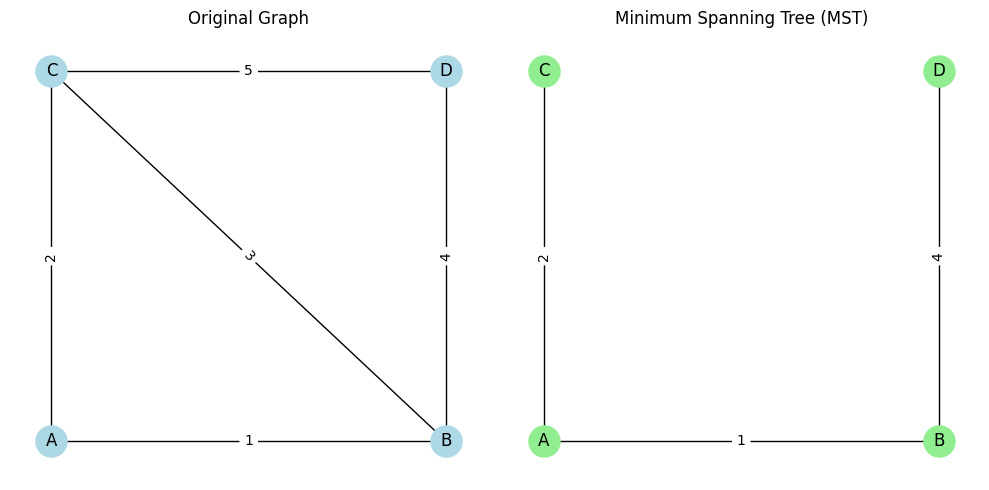

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'D', weight=4)
G.add_edge('C', 'D', weight=5)

# Positions for node visualization
pos = {'A': (0, 0), 'B': (1, 0), 'C': (0, 1), 'D': (1, 1)}

# Initialize MST
MST = nx.Graph()

# Initialize the set of visited nodes
visited = set()

# Start Prim's algorithm from node A
start_node = 'A'
visited.add(start_node)

# Create a list to store edges in MST
mst_edges = []

while len(visited) < len(G.nodes):
    min_edge = None
    min_weight = float('inf')

    for u in visited:
        for v, attrs in G[u].items():
            if v not in visited and attrs['weight'] < min_weight:
                min_edge = (u, v)
                min_weight = attrs['weight']

    if min_edge is not None:
        u, v = min_edge
        mst_edges.append((u, v, {'weight': min_weight}))  # Include 'weight' attribute
        visited.add(v)

# Add MST edges to the MST graph
MST.add_edges_from(mst_edges)

# Visualize the original graph and MST
plt.figure(figsize=(10, 5))

# Original graph
plt.subplot(121)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.title("Original Graph")

# Minimum Spanning Tree
plt.subplot(122)
nx.draw(MST, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(MST, pos, edge_labels={(u, v): d['weight'] for u, v, d in MST.edges(data=True)})
plt.title("Minimum Spanning Tree (MST)")

plt.tight_layout()
plt.show()


<u><b>Q9.</b></u>

You are given the following weighted directed graph representing cities and the distances between them:

A --(1)--> B --(3)--> C\
A--(2)-->D\
D--(2)-->B

Using Dijkstra's algorithm, find the shortest path from node A to node B and show your steps.

<b><u>Solution:</u></b>

1. Initialize the distance from A to all other nodes as infinity and set the distance from A to A as 0.

    - Distances: A: 0, B: ∞, C: ∞, D: ∞

2. Start from node A. Visit node A and update the distances to its neighbors.

    - Distances: A: 0, B: 1, C: ∞, D: 2

3. Move to the node with the smallest distance, which is B. Visit node B and update the distances to its neighbors.

    - Distances: A: 0, B: 1, C: 4, D: 2

4. Move to the node with the smallest distance, which is D. Visit node D and update the distances to its neighbors.

    - Distances: A: 0, B: 1, C: 3, D: 2

5. Move to the node with the smallest distance, which is C. Visit node C and update the distances to its neighbors.

    - Distances: A: 0, B: 1, C: 3, D: 2

6. The shortest path from A to B is [A, B] with a total distance of 1.

<b><u>Justification:</u></b>

- Dijkstra's algorithm is a greedy algorithm used to find the shortest path in a weighted graph.
- The algorithm starts from an initial node (A) and iteratively selects the node with the smallest distance to expand the search.
- By maintaining a set of visited nodes and updating the distances, Dijkstra's algorithm guarantees that it finds the shortest path to all nodes.
- In this example, the shortest path from A to B is [A, B] with a total distance of 1.

Now, let's create a Python code visualization for this question and solution:

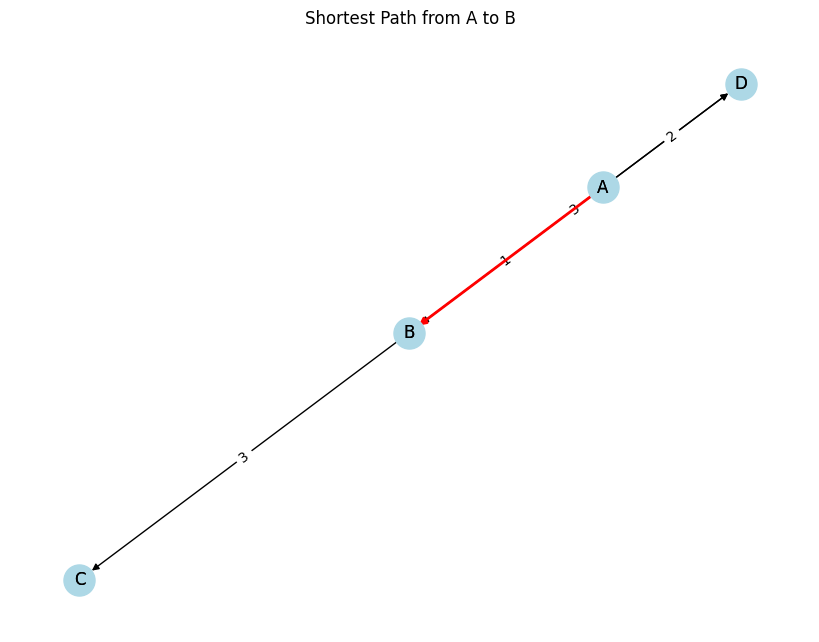

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'D', weight=2)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'D', weight=3)

# Compute shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source='A', target='B', weight='weight')

# Visualization
pos = nx.spring_layout(G)
labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}  # Corrected node labels
edge_labels = {edge: G.edges[edge]['weight'] for edge in G.edges()}  # Corrected edge labels

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)], edge_color='red', width=2)
plt.title("Shortest Path from A to B")

plt.show()


<u><b>Q10.</b></u>

You are given a weighted, undirected graph represented as an adjacency list. Using Kruskal's algorithm, find the minimum spanning tree (MST) of this graph. Provide step-by-step visualization and the final MST.

A --(2)--> B\
B --(3)--> C\
C --(1)--> D\
D --(2)--> E\
E --(4)--> F\
F --(3)--> A\
A --(4)--> D\
B --(3)--> E\
C --(2)--> F

Using Kruskal's algorithm, perform the following steps to find the MST:

- Start with an empty set for the MST.
- Sort all the edges in ascending order by their weights.
- Iterate through the sorted edges:
    -  If adding the edge to the MST does not create a cycle, add it to the MST.
    -  Otherwise, discard the edge.
- Continue this process until the MST contains (V-1) edges, where V is the number of vertices in the graph.


Provide a visualization of each step and the final MST using Python.

<b><u>Solution and Justification:</b></u>

To implement Kruskal's algorithm in Python, follow these steps:

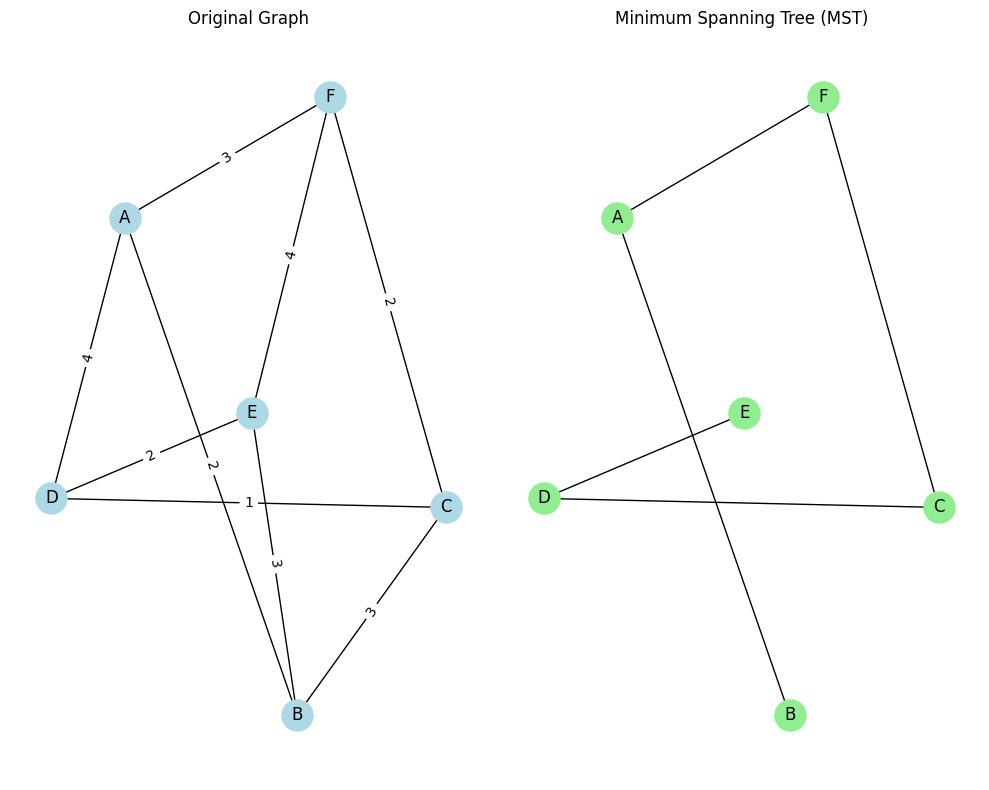

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_edge('A', 'B', weight=2)
G.add_edge('B', 'C', weight=3)
G.add_edge('C', 'D', weight=1)
G.add_edge('D', 'E', weight=2)
G.add_edge('E', 'F', weight=4)
G.add_edge('F', 'A', weight=3)
G.add_edge('A', 'D', weight=4)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'F', weight=2)

# Perform Kruskal's algorithm
mst = nx.minimum_spanning_tree(G)

# Visualization
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 8))

# Original graph
plt.subplot(121)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title("Original Graph")

# Minimum Spanning Tree (MST)
plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=12, font_color='black')
plt.title("Minimum Spanning Tree (MST)")

plt.tight_layout()
plt.show()


This Python code uses NetworkX and Matplotlib to visualize the original graph and the MST produced by Kruskal's algorithm. The MST is highlighted in green.

<u><b>Justification:</b></u>

Kruskal's algorithm is a greedy algorithm that finds the MST by iteratively selecting edges with the smallest weights that do not create cycles in the MST. The algorithm terminates when the MST contains (V-1) edges, where V is the number of vertices in the graph. This ensures that the MST spans all vertices while minimizing the total edge weight. The visualization helps demonstrate the step-by-step process of edge selection and the final MST.